# Entrega 1 - Implementación jugadores Teeko

### Grupo 21:
     - Lucía Bouza  C.I 42897970



## 1. Objetivo

El objetivo de esta tarea es construir un jugador de Teeko. Se propone realizar el diseño de aprendizaje del sistema tal como se muestra en el primer capítulo del libro Machine Learning - Tom M. Mitchell.

Siguiendo dicho formato, definimos para nuestro problema:

- Tarea: Aprender a jugar al Teeko
- Función objetivo: V(tableros) -> Reales
- Representación de la función objetivo: V^(tablero) = wo + w1.x1 + w2.x2 + w3.x3 + w4.x4


Donde,
- x1 = máxima cantidad de fichas jugador, sin fichas del contrincante, tomando de a 4 casillas adyacentes (líneas, diagonales o cuadrados)
- x2 = máxima cantidad de fichas contrincante, sin fichas del jugador, tomando de a 4 casillas adyacentes (líneas, diagonales o cuadrados)
- x3 = mínimo de todas las distancias máximas entre fichas del jugador
- x4 = mínimo de todas las distancias máximas entre fichas del contrincante


La tarea propuesta solicita realizar el entrenamiento del jugador de dos formas diversas, es por eso que para cada jugador los ejemplos de entrenamiento serán diferentes:

- Ejemplos de entrenamiento parte BI: Juegos contra adversario que juega siempre de forma aleatoria

- Ejemplos de entrenamiento parte BII: Juegos contra adversario que es una versión del propio jugador en interación anterior. 

La métrica de performance será para ambos jugadores, la proporción de partidos ganados contra el adversario. Es decir, se enfrentarán los jugadores BI y BII para conocer los porcentajes de partidos ganados, jugando 100 partidos.



## 2. Diseño

El diseño de la solución se realiza tomando el ejemplo del libro, implementando los módulos:

- Generador de experimentos: Genera un nuevo tablero inicial

- Sistema de Performance: Toma el tablero del experimento y realiza una partida, tomando para el jugador los coeficientes aprendidos hasta el momento. Para la parte BI, el contrincante realizará movimientos aleatorios. Para la parte BII el contrincante realizará movimientos según los coeficientes que tenga en ese momento, que habrán sido aprendidos y transferidos por el jugador. Esta función devuelve un listado de tableros que representan las movidas del jugador en la partida (es decir, no se guardan todos los tableros, sino que solamente los que el jugador que aprende modifica).

- Critic: Se encarga de tomar la historia del juego (lista de tableros que forman la partida) y generar los ejemplos de entrenamiento. la valoriación de cada ejemplo se realiza con la valoración del tablero sucesor de la función con los coeficientes aprendidos hasta el momento. 

- Generalizador: Se aproximan los coeficientes con el algoritmo LMS, tomando como entrada los ejemplos de entrenamiento y los coeficientes actuales. 

También se implementan los módulos:
- Jugador: Donde se define su representación y los métodos de movimientos

- Tablero: Donde se define su representación y funciones para inicializar tableros, determinar ganadores y obtener los valores de x para un tablero dado. 

- EntrenarYJugar: Donde se definen las funciones de entrenamiento de los jugadores, y las partidas, para poder invocarlas desde el main o a demanda desde este informe.


    
## 2.1 Juego

Para poder realizar diferentes experimentaciones, se da la posibilidad de elegir en cada tipo de entrenamiento, cual es el jugador que aprende (Rojo o Negro), ya que el jugador Negro es el que siempre tiene el primer movimiento de la partida, y los aprendizajes podrían ser diferentes. 

Se define también que si se alcanzan los 200 movimientos entre los dos jugadores, entonces la partida se ha empatado. 


## 2.2 Tablero

Se elige representar al tablero como cuatro listas de tamaño 4. Una lista representa las coordenadas X de las fichas rojas, otra lista las coordenadas Y de las fichas rojas, y las otras dos el mismo concepto para las fichas negras.

Para ejemplificar, tomemos la siguiente imagen de un tablero. 
Para este tablero, si lo vemos como una matriz donde cada item es un espacio donde puede ir una ficha, los valores de las listas serían:

<div style="clear: left;">
<p style="float: left;"> 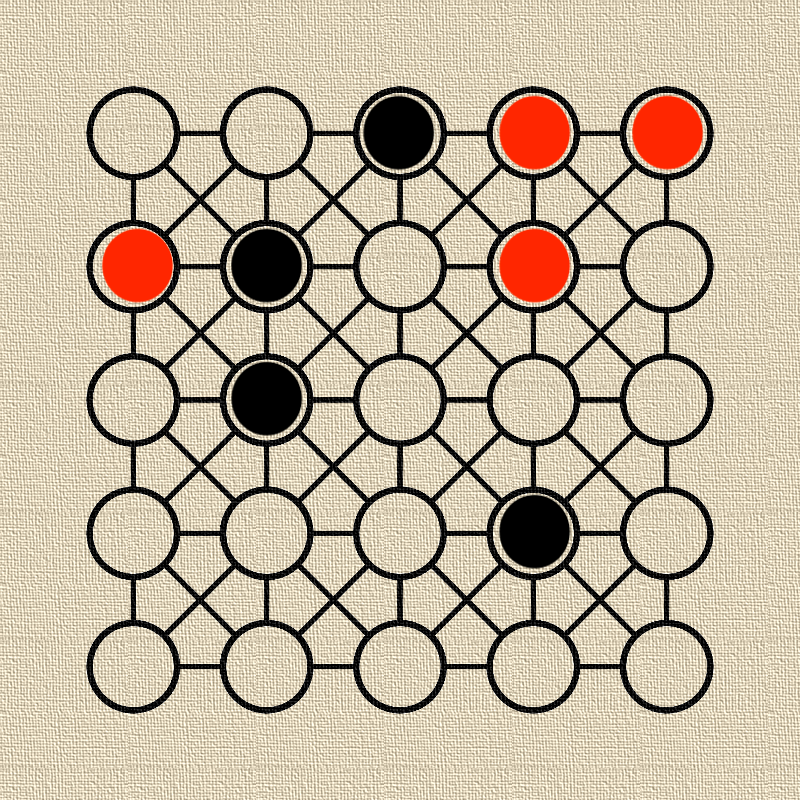
<p> xRojas =[0,0,1,1] <p>
<p> yRojas =[3,4,0,3] <p>
<p> xNegras =[0,1,2,3] <p>
<p> yNegras =[2,1,1,3] <p>
<div style="clear: left;">

    
Al momento de elegir la representación, también se evaluó representar el tablero como una matriz de tamaño 5x5 donde,
- Matriz[x,y]=R si en las coordenadas x,y se encontraba pieza roja, 
- Matriz[x,y]=N si en las coordenadas x,y se encontraba pieza negra,
- Matriz[x,y]= " " si la coordenada no contenía piezas. 

Dicha representación fue descartada por dos razones. La primera es que la primer representación optimiza el uso de memoria. La segunda razón es que se encontró más sencillo determinar tableros ganadores y obtener los valores de X en la primera representación comparando con la segunda.

Por ejemplo: 

- Determinar que las fichas rojas están en una misma fila y consecutivas implica que todos los valores de xRojas sean el mismo y que los valores 1,2 y 3 estén en yRojas.
- Determinar que las fichas rojas estén en una de las diagonales principales y consecutivas implica que todos los valores de la resta de vectores xRojas-yRojas sean 0 y que los valores 1,2 y 3 estén en yRojas.

De manera similar se pueden calcular todas las condiciones de tableros ganadores. Obtener los valores de X para un tablero dado resulta similar, aplicando operaciones aritméticas en las coordneadas del jugador y contrincante.

A continuación se muestran algunas configuraciones de tableros y los valores de los atributos elegidos en la representación de éste. 

<div style="clear: left;">
<p style="float: left;"> 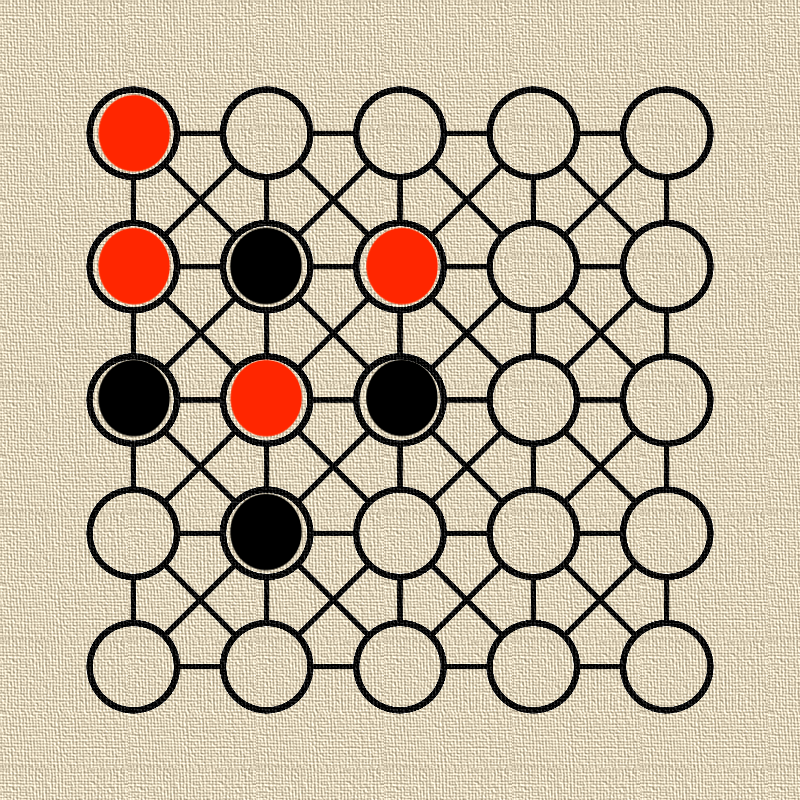
<p> xRojas =[0,1,1,2] <p>
<p> yRojas =[0,0,2,1] <p>
<p> xNegras =[1,2,2,3] <p>
<p> yNegras =[1,0,2,1] <p>
<div style="clear: left;">

Para el siguiente tablero, se muestra adicionalmente una configuración donde el jugador rojo es ganador:
    
<div style="clear: left;">
<p style="float: left;"> 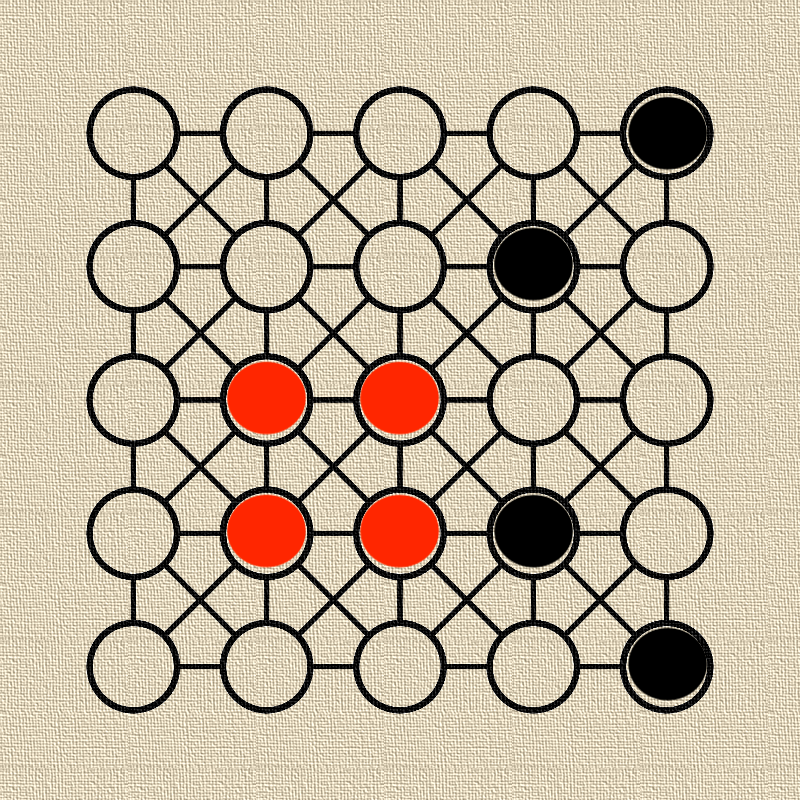
<p> xRojas =[2,2,3,3] <p>
<p> yRojas =[1,2,1,2] <p>
<p> xNegras =[0,1,3,4] <p>
<p> yNegras =[4,3,3,4] <p>
<div style="clear: left;">


## 2.4 Algoritmo

La representación de la función objetivo es la función linear V^ indicada en el punto 1. 
El objetivo del algoritmo es aproximar los coeficientes w0, w1, w2, w3 y w4 que mejor se ajusten a los ejemplos de entrenamiento.

Se define, según el teórico, que los mejores coeficientes son los que minimizan el error cuadrático entre el valor del ejemplo de entrenamiento y el valor dado de la función V^ para dicho entrenamiento. 

Para aproximar dichos coeficientes se utiliza el algoritmo LMS, donde para cada ejemplo de entrenamiento, calcula V^ con los coeficientes aprendidos hasta el momento y luego aplica la fórmula indicada en el código debajo. 

```python
    def lmsWeightUpdate(coeficientes,alpha, EjemplosEntrenamiento):
        coefAux = coeficientes.copy()
        for i in range(len(EjemplosEntrenamiento)-1):
            ejemploEntrenamiento = EjemplosEntrenamiento[i]
            vTecho = calcularValorTablero(coefAux, ejemploEntrenamiento[0])          
            for i in range(5):
               coefAux[i]= coefAux[i] + (alpha*(ejemploEntrenamiento[1] - vTecho)*ejemploEntrenamiento[0][i]) 
        return coefAux
```

El ajuste se realiza con los ejemplos de entrenamiento generados por un partido, al final de éste. El algoritmo utiliza los coeficientes refinados por cada ejemplo de entrenamiento para calcular V^ del siguiente ejemplo y continuar refinando los coeficientes. 

Se prueba con diferentes valores de $\alpha$, la tasa que ayuda a moderar el aprendizaje y la rapidez de cambio de los coeficientes. 

Se prueba con una tasa de 0.4 inicialmente, obteniendose coeficientes fuera de rango. Esto sucede porque al comienzo, cuando los coeficientes no están aproximados, el valor de la función V^ es muy diferente al valor del entrenamiento, por lo que la diferencia es grande, y si la tasa $\alpha$ no es pequeña, los coeficientes comienzan a crecer exponencialmente, llegando rápidamente a salirse de rango. 

Se obtienen resultados aceptables con tasas de $\alpha$ menores a 0.01

## 2.4 Contrarios

Se implementan dos tipos de adversarios, uno que juega de forma aleatoria, y el otro que juega con coeficientes fijos, transferidos por el contrincante cada una determinada cantidad de partidas. Es importante destacar que los jugadores contrarios nunca aprenden por ellos mismos coeficientes. 

Para todos los jugadores, se obtiene una lista de todos los posibles tableros siguientes, alcanzados con movimientos legales. Los movimientos legales son aquellos movimientos de fichas del jugador a casillas adyacentes vacías. 

Para el contrincante aleatorio, para elegir un tablero siguiente, elige al azar entre todos los posibles.

Para el caso del contrincante "mi versión previa", se probaron entrenamientos actualizando sus coeficientes con los aprendidos por el jugador cada 10 o 50 juegos. este contrincante utiliza la el mismo método de elección entre los posibles tableros que el jugador, pero con los coeficientes transferidos.

Definición respecto a los jugadores que elijen tableros basándose en los valores de éstos: Para inyectar azar y que no siempre se elijan los tableros mejor valorados y se exploren otros caminos, se elije un número al azar en el rango de 100, y si este número es mayor a 80, entonces elijo un tablero aleatorio. con este método, en promedio un 20% de las veces se elije un tablero aleatorio entre los posibles. 


## 3. Experimentación

Se presentarán a continuación dos tablas con los diferentes resultados de los entrenamientos BI y BII. Para cada entrenamiento se experimentó con la variación de $\alpha$, la cantidad de entrenaminentos y si el jugador que aprendía era rojo o negro. Para la parte BII además, se experimentó modificando la cantidad de partidas que se espera para hacer la transferencia de conocimiento aprendido al contrincante con el que entrena. 

Para ambos entrenamientos nos quedaremos con la mejor combinación de atributos para cuando aprende siendo Rojo y siendo Negro. De esta manera podremos también sacar conclusiones en la parte C, cuando pongamos a competir a nuestros jugadores, pero alternando el orden en que comienza cada uno. 


## 3.1 Entrenamiento BI

En la tabla 1, se presenta el primer set de resultados para el entrenamiento BI.

<table>
  <tr>
    <th>$\alpha$</th>
    <th>Color Jugador(Rojo/Negro)</th>
    <th>#Partidas entrenamiento</th> 
    <th>#Partidas ganadas por jugador</th>
    <th>#Partidas ganadas por contrincante</th>
    <th>#Partidas empatadas</th>
    <th>Error</th>
  </tr>
  <tr>
    <td>0.05</td>
    <td>Rojo</td>
    <td>1000</td>
    <td>574</td>
    <td>58</td>
    <td>368</td>
    <td>724.1110163674025</td>
  </tr>    
  <tr>
    <td>0.05</td>
    <td>Rojo</td>
    <td>10000</td>
    <td>5698</td>
    <td>687</td>
    <td>3615</td>
    <td>5901.264897793382</td>
  </tr>
  <tr>
    <td>0.05</td>
    <td>Negro</td>
    <td>1000</td>
    <td>546</td>
    <td>0</td>
    <td>454</td>
    <td>495.3654572791199</td>
  </tr>    
  <tr>
    <td>0.05</td>
    <td>Negro</td>
    <td>10000</td>
    <td>5583</td>
    <td>0</td>
    <td>4417</td>
    <td>4891.0355036283545</td>
  </tr>
  <tr>
    <td>0.01</td>
    <td>Rojo</td>
    <td>1000</td>
    <td>653</td>
    <td>53</td>
    <td>291</td>
    <td>291.5558596034268</td>
  </tr>    
  <tr style="font-weight:bold">
    <td>0.01</td>
    <td>Rojo</td>
    <td>10000</td>
    <td>7258</td>
    <td>446</td>
    <td>2296</td>
    <td>2628.5465434167463</td>
  </tr>
  <tr>
    <td>0.01</td>
    <td>Negro</td>
    <td>1000</td>
    <td>746</td>
    <td>0</td>
    <td>254</td>
    <td>258.65268553881214</td>
  </tr>    
  <tr style="font-weight:bold">
    <td>0.01</td>
    <td>Negro</td>
    <td>10000</td>
    <td>8078</td>
    <td>0</td>
    <td>1922</td>
    <td>1927.6837260576056</td>
  </tr>  
    <caption>Tabla 1 - Entrenamiento jugador BI para distintos valores de $\alpha$, jugador que aprende y cantidad de entrenamientos</caption>
</table>

Observando la tabla se aprecia que a menor $\alpha$ y mayor cantidad de entrenamientos, mejora el error. También se observa que los mejores resultados se dan cuando el jugador que aprende es el que tiene el primer turno (Negro). 

A tener en cuenta para el análisis de la tabla, es que el error es la suma de los errores cuadráticos de todos los ejemplos de entrenamiento, por lo que es importante normalizar dichos valores proporcionalmente a la cantidad de entrenamientos. 

Realizando nuevas pruebas se obtiene:

<table>
  <tr>
    <th>$\alpha$</th>
    <th>Color Jugador(Rojo/Negro)</th>
    <th>#Partidas entrenamiento</th> 
    <th>#Partidas ganadas por jugador</th>
    <th>#Partidas ganadas por contrincante</th>
    <th>#Partidas empatadas</th>
    <th>Error</th>
  </tr>
  <tr>
    <td>0.005</td>
    <td>Negro</td>
    <td>10000</td>
    <td>8321</td>
    <td>0</td>
    <td>1679</td>
    <td>2195.8631570635926</td>
  </tr> 
  <tr>
    <td>0.0005</td>
    <td>Negro</td>
    <td>100</td>
    <td>48</td>
    <td>0</td>
    <td>52</td>
    <td>410.87679726028966</td>
  </tr> 
  <tr>
    <td>0.0005</td>
    <td>Negro</td>
    <td>1000</td>
    <td>256</td>
    <td>0</td>
    <td>744</td>
    <td>651.3822060347928</td>
  </tr> 
  <tr> 
    <td>0.0001</td>
    <td>Negro</td>
    <td>1000</td>
    <td>277</td>
    <td>0</td>
    <td>723</td>
    <td>2147.8197326015497</td>
  </tr> 
  <tr style="font-weight:bold"> 
    <td>0.0001</td>
    <td>Negro</td>
    <td>10000</td>
    <td>2464</td>
    <td>0</td>
    <td>7536</td>
    <td>4019.8216751693967</td>
  </tr> 
  <tr style="font-weight:bold"> 
    <td>0.0001</td>
    <td>Rojo</td>
    <td>10000</td>
    <td>997</td>
    <td>1314</td>
    <td>7689</td>
    <td>4391.9324380150265</td>
  </tr> 
  <caption>Tabla 2 - Entrenamiento jugador BI para distintos valores de $\alpha$, jugador que aprende y cantidad de entrenamientos</caption>
</table>

Observando la tabla se aprecia que a menor $\alpha$ el error disminuye. También se observa que si se baja mucho $\alpha$, es necesario aumentar también la cantidad de entrenamientos ya que con una tasa chica el aprendizale es más lento. 

Se determina entonces realizar la partida C con los valores $\alpha$=0.0001, entrenamientos= 10000.

los coeficientes aprendidos son:

- cuando jugador que aprende es Rojo: [0.051661198551319495, -0.011908252642370772, -0.012119473752941645, -0.005557277301149309, -0.00805516444163697]
- cuando jugador que aprende es Negro: [0.07848398359367571, -0.009869890438564984, -0.008309756039832155, -0.00476003430867389, -0.007581870728714234]

Se grafica el error cuadrático total del conjunto de entrenamiento a medida que pasan los juegos, para el caso $\alpha$=0.0001, entrenamientos= 10000, jugador que aprende= Negro

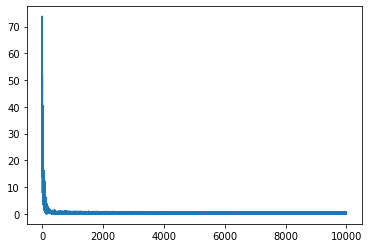

## 3.2 Entrenamiento BII

En la tabla 2, se presentan los distintos resultados para el entrenamiento BII.

<table>
  <tr>
    <th>$\alpha$</th>
    <th>Color Jugador(Rojo/Negro)</th>
    <th>#Partidas entrenamiento</th> 
    <th>Lapso pasaje conocimiento</th> 
    <th>#Partidas ganadas por jugador</th>
    <th>#Partidas ganadas por contrincante</th>
    <th>#Partidas empatadas</th>
    <th>Error</th>
  </tr>
  <tr>
    <td>0.05</td>
    <td>Rojo</td>
    <td>1000</td>
    <td>10</td>
    <td>396</td>
    <td>425</td>
    <td>179</td>
    <td>22308951063.17209</td>
  </tr>    
  <tr>
    <td>0.05</td>
    <td>Rojo</td>
    <td>10000</td>
    <td>10</td>
    <td>3902</td>
    <td>3935</td>
    <td>2163</td>
    <td>3.8400966467776866e+69</td>
  </tr>
  <tr>
    <td>0.05</td>
    <td>Negro</td>
    <td>1000</td>
    <td>10</td>
    <td>419</td>
    <td>335</td>
    <td>246</td>
    <td>5405.7131603880225</td>
  </tr>    
  <tr>
    <td>0.05</td>
    <td>Negro</td>
    <td>10000</td>
    <td>10</td>
    <td>3930</td>
    <td>3117</td>
    <td>2897</td>
    <td>3.9928055417739917e+107</td>
  </tr>
  <tr>
    <td>0.01</td>
    <td>Rojo</td>
    <td>1000</td>
    <td>10</td>
    <td>515</td>
    <td>277</td>
    <td>208</td>
    <td>640.5576434317019</td>
  </tr>    
  <tr style="font-weight:bold">
    <td>0.01</td>
    <td>Rojo</td>
    <td>10000</td>
    <td>10</td>
    <td>5852</td>
    <td>2510</td>
    <td>1638</td>
    <td>5980.604434681026</td>
  </tr>
  <tr>
    <td>0.01</td>
    <td>Negro</td>
    <td>1000</td>
    <td>10</td>
    <td>617</td>
    <td>233</td>
    <td>150</td>
    <td>679.7999474788451</td>
  </tr>    
  <tr>
    <td>0.01</td>
    <td>Negro</td>
    <td>10000</td>
    <td>10</td>
    <td>5996</td>
    <td>2347</td>
    <td>1657</td>
    <td>6343.59965624203</td>
  </tr>
  <tr>
    <td>0.05</td>
    <td>Rojo</td>
    <td>1000</td>
    <td>50</td>
    <td>450</td>
    <td>388</td>
    <td>162</td>
    <td>1.2535718208268597e+34</td>
  </tr>    
  <tr>
    <td>0.05</td>
    <td>Rojo</td>
    <td>10000</td>
    <td>50</td>
    <td>3644</td>
    <td>3704</td>
    <td>2652</td>
    <td>7.71643945722786e+255</td>
  </tr>
  <tr>
    <td>0.05</td>
    <td>Negro</td>
    <td>1000</td>
    <td>50</td>
    <td>376</td>
    <td>349</td>
    <td>275</td>
    <td>1529.9046658700977</td>
  </tr>    
  <tr>
    <td>0.05</td>
    <td>Negro</td>
    <td>10000</td>
    <td>50</td>
    <td>3809</td>
    <td>3722</td>
    <td>2469</td>
    <td>2.079197344333677e+64</td>
  </tr>
  <tr>
    <td>0.01</td>
    <td>Rojo</td>
    <td>1000</td>
    <td>50</td>
    <td>491</td>
    <td>341</td>
    <td>168</td>
    <td>691.2749638665206</td>
  </tr>    
  <tr>
    <td>0.01</td>
    <td>Rojo</td>
    <td>10000</td>
    <td>50</td>
    <td>5109</td>
    <td>3147</td>
    <td>1744</td>
    <td>6007.839090574057</td>
  </tr>
  <tr>
    <td>0.01</td>
    <td>Negro</td>
    <td>1000</td>
    <td>50</td>
    <td>612</td>
    <td>240</td>
    <td>148</td>
    <td>691.0008242584472</td>
  </tr>    
  <tr style="font-weight:bold">
    <td>0.01</td>
    <td>Negro</td>
    <td>10000</td>
    <td>50</td>
    <td>5077</td>
    <td>2804</td>
    <td>2119</td>
    <td>6130.2237288865235</td>
  </tr>  
    <caption>Tabla 3 - Entrenamiento jugador BII para distintos valores de $\alpha$, jugador que aprende, cantidad de entrenamientos y lapso de pasaje de conocimientos a contrincante</caption>
</table>

observaciones de los entrenamientos:

- para $\alpha$=0.05 los errores son muy altos
- a menor $\alpha$ y mayor cantidad de entrenamientos, mejora el error
- para $\alpha$=0.01 los resultados de error no cambian significativamente al cambiar el jugador que aprende
- el lapso de pasaje de conocimiento no parece impactar significativamente en el error.

Realizando nuevas pruebas se obtiene:

<table>
  <tr>
    <th>$\alpha$</th>
    <th>Color Jugador(Rojo/Negro)</th>
    <th>#Partidas entrenamiento</th> 
    <th>#Partidas ganadas por jugador</th>
    <th>#Partidas ganadas por contrincante</th>
    <th>#Partidas empatadas</th>
    <th>Error</th>
  </tr>
  <tr>
    <td>0.0005</td>
    <td>Rojo</td>
    <td>100</td>
    <td>31</td>
    <td>24</td>
    <td>45</td>
    <td>454.96083940070076</td>
  </tr> 
  <tr>
    <td>0.0005</td>
    <td>Rojo</td>
    <td>100</td>
    <td>31</td>
    <td>24</td>
    <td>45</td>
    <td>454.96083940070076</td>
  </tr> 
  <tr>
    <td>0.0005</td>
    <td>Rojo</td>
    <td>1000</td>
    <td>75</td>
    <td>226</td>
    <td>699</td>
    <td>837.3825126980914</td>
  </tr> 
  <tr style="font-weight:bold"> 
    <td>0.0001</td>
    <td>Rojo</td>
    <td>10000</td>
    <td>495</td>
    <td>2318</td>
    <td>7183</td>
    <td>4533.915297527834</td>
  </tr>
  <tr style="font-weight:bold">
    <td>0.0001</td>
    <td>Negro</td>
    <td>10000</td>
    <td>3346</td>
    <td>827</td>
    <td>5827</td>
    <td>5416.068948379353</td>
  </tr>
  <caption>Tabla 4 - Entrenamiento jugador BII para distintos valores de $\alpha$, jugador que aprende y cantidad de entrenamientos</caption>
</table>

Se determina entonces realizar la partida C con los valores $\alpha$=0.0001, entrenamientos= 10000.

los coeficientes aprendidos son:

- cuando jugador que aprende es Rojo: [-0.003645112249265559, -0.0029079778065597343, -0.0031438169699154975, -0.00023749995453100386, -0.00046441858049697023]
- cuando jugador que aprende es Negro: [0.031525230118356166, -0.004013522063687348, 0.03731890467281062, -0.0035292895751130905, 0.009850139222820362]

Se grafica el error cuadrático total del conjunto de entrenamiento a medida que pasan los juegos, para el caso $\alpha$=0.0001, entrenamientos= 10000, jugador que aprende= Rojo

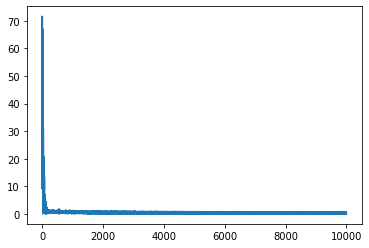

## 3.3 Ejecución de entrenamientos

Aquí se da la posibilidad de ejecutar entrenamientos:

Juegos ganados por ROJO:  0
Juegos ganados por NEGRO:  41
Juegos empatados: 59
Suma Error cuadrático: 264.0096238552065
Grafica Error Cuadrático  


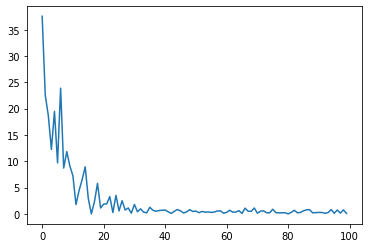

In [1]:
import EntrenarYJugar 
# Aqui se pueden modificar los parámetros para ejecutar los diferentes entrenamientos
alpha = 0.001
cantidadEntrenamiento = 100
jugadorQueAprende = 'Negro'
Parte = 'BI'
coefJugador = EntrenarYJugar.train(cantidadEntrenamiento, alpha, jugadorQueAprende, Parte)


## 3.4 Partidas entre BI y BII

Con los coeficientes aprendidos en la parte BI y BII se realizan 100 partidas entre los jugadores.

Realizamos dos partidas diferentes:

- la primera donde BI juega con las fichas rojas, con los mejores coeficientes que aprendió en el entrenamiento jugando con estas fichas. BII juega con fichas negras, con los coeficientes aprendidos cuando entrenó con éstas. Ambos jugadores aprendieron con las variables $\alpha$=0.0001, entrenamientos= 10000.
- La segunda donde BI juega con las fichas negras, con los mejores coeficientes que aprendió en el entrenamiento jugando con estas fichas. BII juega con fichas rojas, con los coeficientes aprendidos cuando entrenó con éstas. Ambos jugadores aprendieron con las variables $\alpha$=0.0001, entrenamientos= 10000.


<table>
  <tr>
    <th>Jugador BI</th>
    <th>Jugador BII</th>
    <th>#Partidas ganadas por BI</th>
    <th>#Partidas ganadas por BII</th>
    <th>#Partidas empatadas</th>
  </tr>
  <tr>
    <td>Rojo</td>
    <td>Negro</td>
    <td>1</td>
    <td>86</td>
    <td>13</td>
  </tr> 
  <tr>
    <td>Negro</td>
    <td>Rojo</td>
    <td>25</td>
    <td>2</td>
    <td>73</td>
  </tr> 
</table>    
    

## 3.5 Ejecución de partidas

Aquí, cambiando los coeficientes y la cantidad de partidas, se puede ejecutar juegos:

In [2]:
import EntrenarYJugar 

#Variables a modificar
CoeficientesRojo = [0.051661198551319495, -0.011908252642370772, -0.012119473752941645, -0.005557277301149309, -0.00805516444163697]
CoeficientesNegro = [0.031525230118356166, -0.004013522063687348, 0.03731890467281062, -0.0035292895751130905, 0.009850139222820362]
cantPartidas = 100

EntrenarYJugar.Jugar(CoeficientesRojo, CoeficientesNegro, cantPartidas)



Juegos ganados por Jugador Rojo:  4
Juegos ganados por Jugador Negro:  91
Juegos empatados: 5


## 4. Conclusión

En base a lo implementado y los resultados obtenidos, se concluye:

A mayor valor de la constante $\alpha$ que modera la velocidad de ajuste de los coeficientes, los coeficientes cambian más rápido, la función oscila, no ayudando a disminuir el error, y disparando los valores de los coeficientes. 

A menores valores de $\alpha$, la función se ajusta más correctamente, disminuyendo el error, pero requiere de más ejemplos de entrenamiento para aproximarlos. 

Para ambos ejemplos se elijen $\alpha$=0.0001 y entrenamientos= 10000. Para mejorar los resultados podríamos aumentar la cantidad de entrenamientos y disminuir $\alpha$.

Los jugadores siempre tienen mayor éxito cuando son los que dan la primer movida (Negro), pero se dan mejores resultados en el jugador entrenado con su versión previa (parte BII). 

